In [1]:
import matplotlib    
import matplotlib.font_manager

[f.name for f in matplotlib.font_manager.fontManager.ttflist if 'Nanum' in f.name]
 # ['NanumBarunGothic',
 # 'NanumMyeongjo',
 # 'NanumMyeongjo',
 # 'NanumGothic',
 # 'NanumBarunGothic',
 # 'NanumGothic']

['NanumGothic',
 'NanumMyeongjo',
 'NanumMyeongjo',
 'NanumBarunGothic',
 'NanumSquare',
 'NanumSquareRound',
 'NanumBarunGothic',
 'NanumGothic',
 'NanumSquareRound',
 'NanumSquare']

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
# 유니코드 깨짐현상 해결
mpl.rcParams['axes.unicode_minus'] = False

# 나눔고딕 폰트 적용
plt.rcParams["font.family"] = 'NanumGothic'

In [5]:
import os
import pandas as pd

os.getcwd()

'/home/piai/바탕화면/01 실습파일/1 Big Data 분석 기초'

In [10]:
os.chdir('/home/piai/바탕화면/01 실습파일/1 Big Data 분석 기초')

In [11]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [12]:
df_fitness = pd.read_csv("FITNESS.csv", encoding = 'euc-kr')
df_fitness.head()

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.15,59.571,8.17,166,40,172
1,Gracie,여성,38,30대,81.87,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.84,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.87,54.625,8.92,146,48,155
4,Chris,남성,49,40대,81.42,49.156,8.95,180,44,185


# 탐색적 분석 - 기술통계 실습

In [674]:
df_titanic = pd.read_csv("titanic.csv", encoding = 'euc-kr')
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [675]:
df_titanic.info()
df_titanic.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.758889,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002570,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,30.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [676]:
df_titanic.shape

(891, 12)

In [677]:
# 결측치 확인 : pandas.DataFrame.isnull() 또는 pandas.DataFrame.isna()
df_titanic.isnull().head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False


In [678]:
# 결측치 확인 : pandas.DataFrame.isnull() 또는 pandas.DataFrame.isna()
df_titanic.isna().head() 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False


In [679]:
# 결측치(True) 현황 요약 :sum 함수
df_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [680]:
# 분석에 필요하지 않은 변수 제외
df_titanic = df_fitness.drop(['Cabin','PassengerId','Ticket','Name'], axis = 1)
df_titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [681]:
unique_values = df['Embarked'].value_counts() 
unique_values

S    541
C    104
Q     75
Name: Embarked, dtype: int64

In [682]:
# 문자형 결측치 처리:pandas.DataFrame.fillna(값, inplace: 결측치 입력 후 저장 여부)
df_titanic["Embarked"].fillna("S", inplace = True)
df_titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [683]:
df_titanic.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

<Axes: >

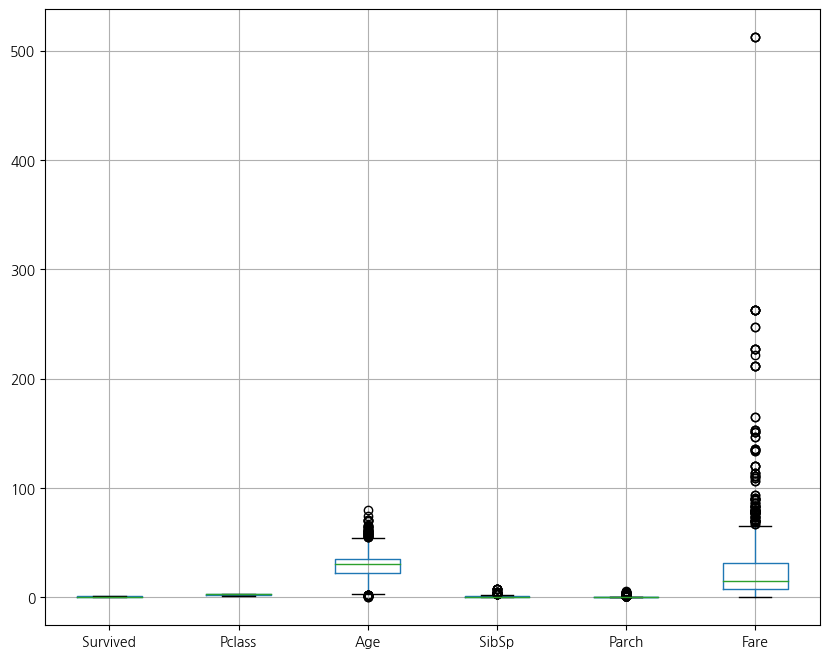

In [684]:
df_titanic.boxplot(figsize = (10, 8))

In [685]:
# 범주형 변수의 Dummy 변수화
df_titanic_dummy = pd.get_dummies(df_titanic, columns=['Sex', 'Embarked'], drop_first = True)
df_titanic_dummy.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [686]:
# scale변환: 평균,표준편차 기준
df_scale_std = StandardScaler()
df_scale_std = df_scale_std. fit_transform(df_titanic_dummy)  

# scale 적용/변환하면 numpy의 ndarray 형태로 저장 -> DataFrame으로 변환
df_scale_std = pd.DataFrame(df_scale_std, columns = df_titanic_dummy.columns)
df_scale_std.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,-0.789272,0.827377,-0.597055,0.432793,-0.473674,-0.502445,0.737695,-0.307562,0.615838
1,1.266990,-1.566107,0.634162,0.432793,-0.473674,0.786845,-1.355574,-0.307562,-1.623803
2,1.266990,0.827377,-0.289251,-0.474545,-0.473674,-0.488854,-1.355574,-0.307562,0.615838
3,1.266990,-1.566107,0.403309,0.432793,-0.473674,0.420730,-1.355574,-0.307562,0.615838
4,-0.789272,0.827377,0.403309,-0.474545,-0.473674,-0.486337,0.737695,-0.307562,0.615838


In [687]:
df_scale_desc = df_scale_std.describe()
df_scale_desc.round(3)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
count,891.000,891.000,891.000,891.000,891.000,891.000,891.000,891.000,891.000
mean,0.000,-0.000,0.000,0.000,0.000,0.000,-0.000,0.000,-0.000
std,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001
min,-0.789,-1.566,-2.258,-0.475,-0.474,-0.648,-1.356,-0.308,-1.624
25%,-0.789,-0.369,-0.597,-0.475,-0.474,-0.489,-1.356,-0.308,-1.624
50%,-0.789,0.827,0.019,-0.475,-0.474,-0.357,0.738,-0.308,0.616
75%,1.267,0.827,0.403,0.433,-0.474,-0.024,0.738,-0.308,0.616
max,1.267,0.827,3.866,6.784,6.974,9.667,0.738,3.251,0.616


In [688]:
df_titanic[(df_titanic["Fare"] >= 400)]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
258,1,1,female,35.0,0,0,512.3292,C
679,1,1,male,36.0,0,1,512.3292,C
737,1,1,male,35.0,0,0,512.3292,C


In [689]:
df_titanic = df_titanic[(df_titanic["Fare"] < 400)]
df_titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,30.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


<Axes: >

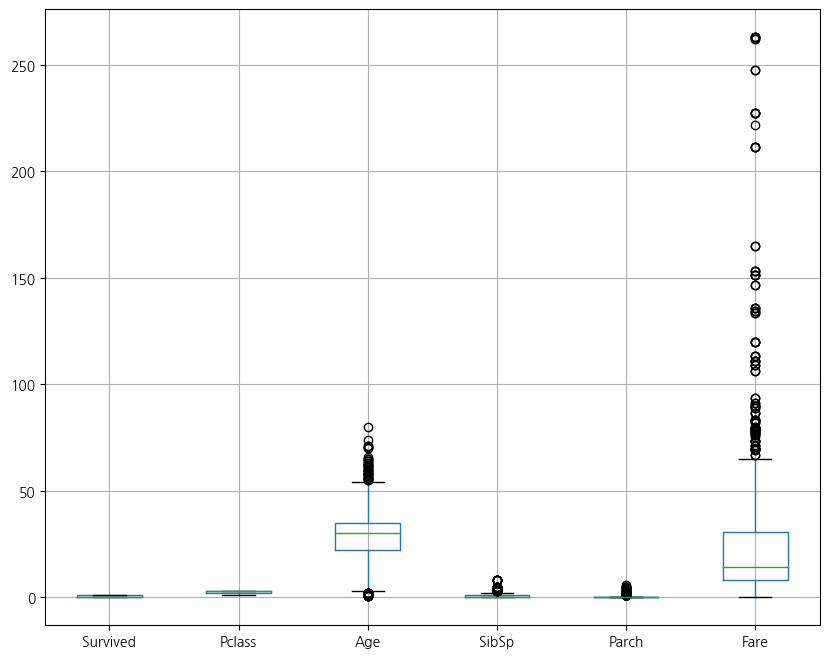

In [692]:
df_titanic.boxplot(figsize = (10, 8))

In [693]:
#Q1 = df_titanic['Fare'].quantile(0.25)
#Q3 = df_titanic['Fare'].quantile(0.75)
#IQR = Q3 - Q1

#lower_bound = Q1 - 1.5 * IQR
#upper_bound = Q1 + 1.5 * IQR

In [694]:
# df_titanic = df_titanic[(df_titanic["Fare"] >= lower_bound) & (df_titanic["Fare"] <= upper_bound)]
# df_titanic = df_titanic[(df_titanic["Fare"] <= 200)

In [696]:
df_titanic = df_titanic[(df_titanic["Fare"] < 400)]
df_titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,30.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [697]:
df_titanic.reset_index(drop = True, inplace=True)
df_titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
866,0,2,male,27.0,0,0,13.0000,S
867,1,1,female,19.0,0,0,30.0000,S
868,0,3,female,30.0,1,2,23.4500,S
869,1,1,male,26.0,0,0,30.0000,C


In [698]:
df_titanic.info()
df_titanic.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 871 entries, 0 to 870
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  871 non-null    int64  
 1   Pclass    871 non-null    int64  
 2   Sex       871 non-null    object 
 3   Age       871 non-null    float64
 4   SibSp     871 non-null    int64  
 5   Parch     871 non-null    int64  
 6   Fare      871 non-null    float64
 7   Embarked  871 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 54.6+ KB


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [699]:
df_titanic['AgeGroup'] = pd.cut(df_titanic['Age'], bins=[0, 12, 18, 30, 50, 80], labels=['Child', 'Teenager', 'YoungAdult', 'Adult', 'Senior'])

In [700]:
df_titanic['FamilySize'] = df_titanic['SibSp'] + df_titanic['Parch'] + 1  # +1은 본인 포함

In [701]:
df_titanic['SexGroup'] = df_titanic['Sex'].map({'male': 'M', 'female': 'F'})

In [702]:
df_titanic['EmbarkedGroup'] = df_titanic['Embarked'].map({'C': 'Cherbourg', 'Q': 'Queenstown', 'S': 'Southampton'})

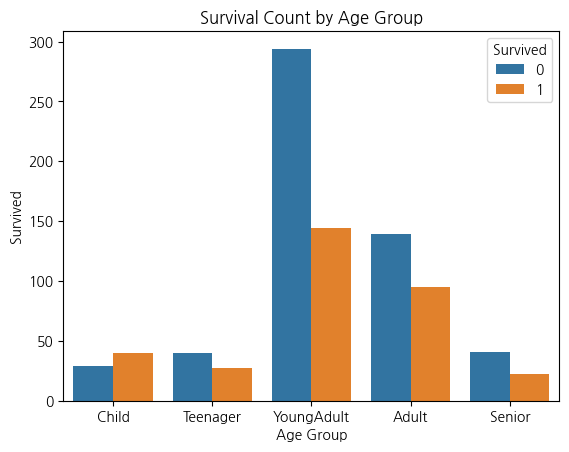

In [703]:
# 연령대 Bar Chart
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="AgeGroup", hue="Survived", data=df_titanic)
plt.title('Survival Count by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survived')
plt.show()

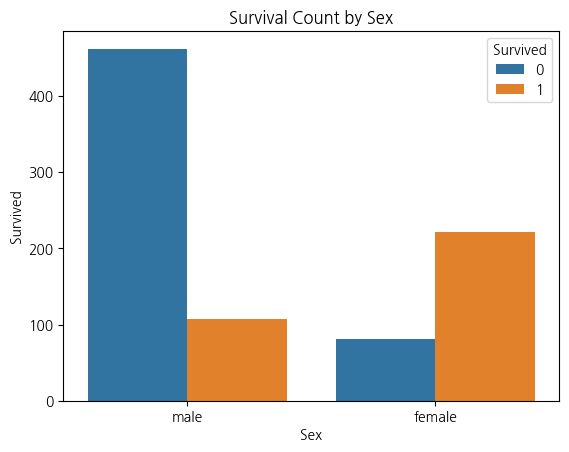

In [704]:
sns.countplot(x="Sex",hue="Survived", data=df_titanic)
plt.title('Survival Count by Sex')
plt.xlabel('Sex')
plt.ylabel('Survived')
plt.show()

<Axes: xlabel='SexGroup', ylabel='Fare'>

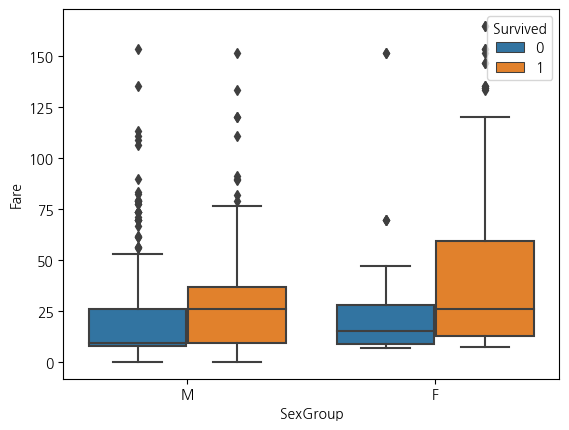

In [705]:
sns.boxplot(y='Fare', x= 'SexGroup', hue='Survived', data=df_titanic)

<Axes: xlabel='AgeGroup', ylabel='Fare'>

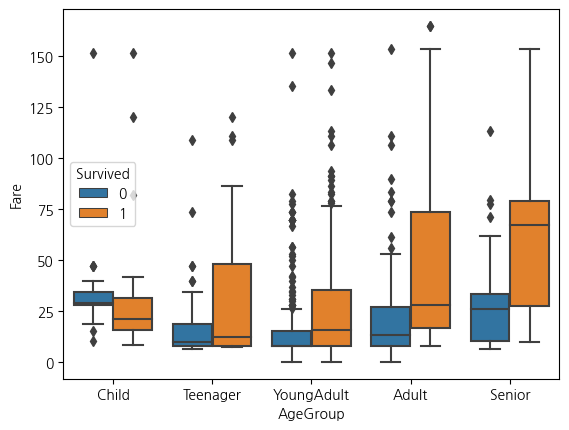

In [706]:
sns.boxplot(y='Fare', x= 'AgeGroup', hue='Survived', data=df_titanic)

<Axes: xlabel='EmbarkedGroup', ylabel='Fare'>

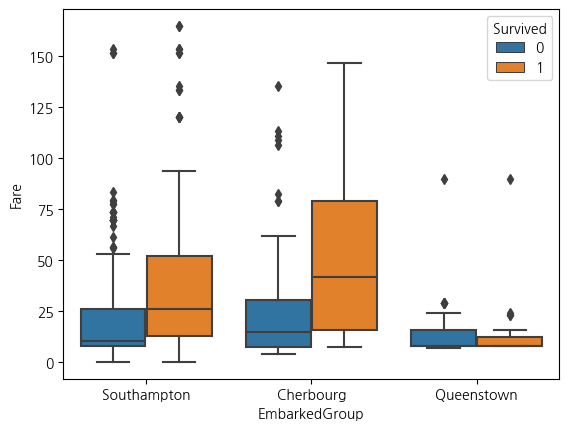

In [707]:
sns.boxplot(y='Fare', x= 'EmbarkedGroup', hue='Survived', data=df_titanic)

In [709]:
df_titanic.select_dtypes('number').corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Survived,1.000000,-0.329285,-0.072542,-0.040547,0.080408,0.298671,0.011916
Pclass,-0.329285,1.000000,-0.339002,0.094324,0.051138,-0.653248,0.090337
Age,-0.072542,-0.339002,1.000000,-0.229503,-0.193322,0.126650,-0.253948
SibSp,-0.040547,0.094324,-0.229503,1.000000,0.409380,0.246085,0.891915
Parch,0.080408,0.051138,-0.193322,0.409380,1.000000,0.230427,0.777706
Fare,0.298671,-0.653248,0.126650,0.246085,0.230427,1.000000,0.283764
FamilySize,0.011916,0.090337,-0.253948,0.891915,0.777706,0.283764,1.000000


<Axes: >

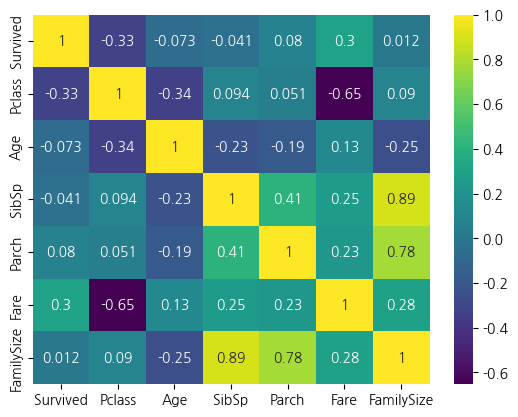

In [710]:
sns.heatmap(df_titanic.select_dtypes('number').corr(), annot=True, cmap="viridis")

<Axes: >

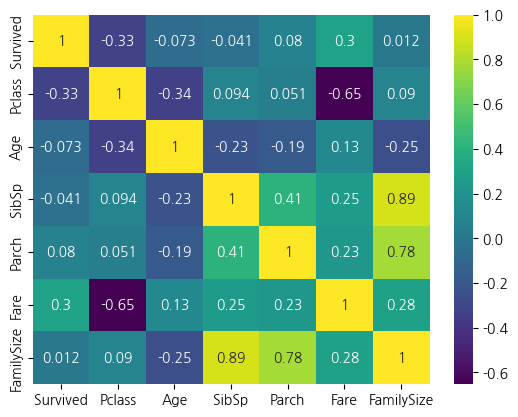

In [711]:
# 상관분석
df_corr = df_titanic.corr()
sns.heatmap(df_corr, annot = True, cmap="viridis")

In [ ]:
# embarked 2개의 결측치는 최빈값 S로 처리
# Fare에서 400 이상의 값은 이상치로 처리
# dummy 변수 생성
# 생존에 영향을 미치는 잠재 인자 도출 : Fare
# 생존에 영향을 미치는 잠재 인자 도출 : EmbarkedGroup
# 생존에 영향을 미치는 잠재 인자 도출 : AgeGroup
# 이유 -> Box plot에서 차이가 큼